# Gun deaths in the US: Analysis

In this project, we are analyzing data on gun deaths in the US.

The dataset we use is stored in guns.csv : It contains information on gun deaths in the US from 2012 to 2014. Each row in the dataset represents a single fatality. The columns contain demographic and other information about the victim.

In [128]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import csv
from datetime import datetime
from itertools import groupby
import pandas as pd


In [129]:
f=open("guns.csv","r")
data=list(csv.reader(f))
print('Number of data rows: ',len(data))
header=data[0]
data=data[1:]
print ("Header of guns.csv: ")
print(header)

Number of data rows:  100799
Header of guns.csv: 
['', 'year', 'month', 'intent', 'police', 'sex', 'age', 'race', 'hispanic', 'place', 'education']


### Gun deaths per year ?


In [130]:
years=[]
for row in data:
    years.append(row[1])
    
year_counts={}
for element in years:
    if element in year_counts:
        year_counts[element]+=1
    else: year_counts[element]=1
print(year_counts)


{'2012': 33563, '2013': 33636, '2014': 33599}


The number of gun deaths did not change much between 2012,2013 and 2014. Let's see if gun deaths in the US changed by month and year:

### Gun deaths per year and month?


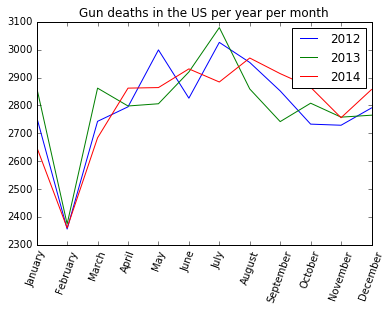

In [131]:

dates=[]
for row in data:
    dates.append(datetime(year=int(row[1]), month=int(row[2]),day=1))
                 
date_counts={}
for date in dates:
    if date in date_counts:
        date_counts[date]+=1
    else: date_counts[date]=1

s=pd.Series(date_counts,name='Count')
s.index.name = 'Date'
s.reset_index()
s=pd.DataFrame(s).reset_index()
s['year']=s['Date'].apply(lambda x: x.year)
s['month']=s['Date'].apply(lambda x: x.month)

for year in [2012,2013,2014]:
    x=s.ix[s.year==year,'month']
    y=s.ix[s.year==year,'Count']
    plt.plot(x,y,label=year)
    months = ['January','February','March','April','May','June','July','August','September','October','November','December']
    plt.xticks(x, months)
    plt.xticks(rotation=70)
    plt.legend()
    plt.title("Gun deaths in the US per year per month")




This plot shows number of gun deaths per month for the years 2012,2013 and 2014. Overall, the number of gun deaths remained between 2600 and 3000 over the 3 years except for :
- a very sharp decrease in February(2012,2013 and 2014) where values were as low as 2350 and 
- a maximal value of 3100 reached in July 2013.

What could explain the drop in gun death victimes  in February each year and the increase in July 2013? This could be linked to historical factors as well as racial factors. Also February being the shortest month of the year could have somme effect on the count of gun deaths.


What to do next? 
The sex and race columns contain potentially interesting information on how gun deaths in the US vary by gender and race. 



### Gun deaths by race and gender 

In [132]:
sex_counts={}
for row in data:
    if row[5] in sex_counts:
        sex_counts[row[5]]+=1
    else: sex_counts[row[5]]=1
print(sex_counts)


race_counts={}
for row in data:
    if row[7] in race_counts:
        race_counts[row[7]]+=1
    else: race_counts[row[7]]=1
print(race_counts)



{'M': 86349, 'F': 14449}
{'Hispanic': 9022, 'White': 66237, 'Black': 23296, 'Asian/Pacific Islander': 1326, 'Native American/Native Alaskan': 917}


 What we've learned so far:

There are 8 times more male gun death victims than female.

The White race is the one with the most gun deaths (66237) followed by the Black race (23296). Native Americans/Native Alaskans, Hispanics and Asians/Pacific Islanders account for around 11265 gun deaths.

However, our analysis only gives us the total number of gun deaths by race in the US. Unless we know the proportion of each race in the US, we won't be able to meaningfully compare those numbers. What we really want to get is the percentage of the gun death victims that fall into each racial category.

We will load a dataset stored in census.csv which contains the following info:

### Rates of Gun Deaths per 100,000 by Race


In [136]:
census=list(csv.reader(open("census.csv")))
header=census[0]
census=census[1]

i=-1
for element in header:
    i+=1
    print(i,element)
    

0 Id
1 Year
2 Id
3 Sex
4 Id
5 Hispanic Origin
6 Id
7 Id2
8 Geography
9 Total
10 Race Alone - White
11 Race Alone - Hispanic
12 Race Alone - Black or African American
13 Race Alone - American Indian and Alaska Native
14 Race Alone - Asian
15 Race Alone - Native Hawaiian and Other Pacific Islander
16 Two or More Races


In [137]:

mapping={}
mapping['Asian/Pacific Islander']=float(census[14]+census[15])
mapping['Black']=float(census[12])
mapping['White']=float(census[10])
mapping['Hispanic']=float(census[11])
mapping['Native American/Native Alaskan']=float(census[13])

race_per_hundredk={}
for key in race_counts.keys():
    race_per_hundredk[key]=round((race_counts[key]/mapping[key])*100000,3)

print(race_per_hundredk)

{'Asian/Pacific Islander': 0.0, 'White': 33.568, 'Hispanic': 20.22, 'Native American/Native Alaskan': 24.522, 'Black': 57.877}


In the US, 57.88 out of every 100000 people in the Black census race category and 33.57 out of every 100000 people in the White census race category were killed by guns between 2012 and 2014.

It yields that gun related violence in the US strongly affects people in the Black and White racial categories.

We can now look deeper into intent of gun violence, age and education level of victims as well as their education since these values are available to us in the guns.csv database.


### Intent of gun violence:
We can filter our results, and restrict them to the Homicide intent. This will tell us what the gun-related murder rate per 100000 people in each racial category is.


In [135]:
intents=[]
races=[]
for row in data:
    intents.append(row[3])
    races.append(row[7])


homicide_race_counts={}
i=-1
for race in races:
    i+=1
    if intents[i]=="Homicide":
        if race in homicide_race_counts:
            homicide_race_counts[race]+=1
        else: homicide_race_counts[race]=1

for key in homicide_race_counts.keys():
    homicide_race_counts[key]=round((homicide_race_counts[key]/mapping[key])*100000,2)

print(homicide_race_counts)

{'Hispanic': 12.63, 'White': 4.64, 'Asian/Pacific Islander': 0.0, 'Native American/Native Alaskan': 8.72, 'Black': 48.47}


48.47 out of every 100000 people in the Black census race category in the US were murdered with guns between 2012 and 2014, followed by the Hispanic census with a rate of 12.63 out of 100000.

It yields that gun related homicides in the US strongly affect people in the Black and Hispanic racial categories.